# Employee Attrition Under the Microscope: Insights & Strategies to Retain Top Talent

This analysis aims to uncover key patterns and drivers behind employee attrition. By gaining insights from historical data, organizations can design more effective retention strategies to keep their top talent.

- **Dataset**: [IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Tools**: Python (Pandas, Matplotlib, Seaborn), PowerBI
- **Output**: PDF Report, PowerBI Dashboard, Jupyter Notebook

## A. Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## B. Data Load

In [3]:
# Load Dataset
df = pd.read_csv('dataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## C. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Drop Duplicate
df = df.drop_duplicates()

## D. Exploratory Data Analysis (EDA)

### 1. Which Departments Have the Highest Attrition Among Employees Dissatisfied with Their Work Environment?

C:\Users\rifat\AppData\Local\Temp\ipykernel_6744\1823074728.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


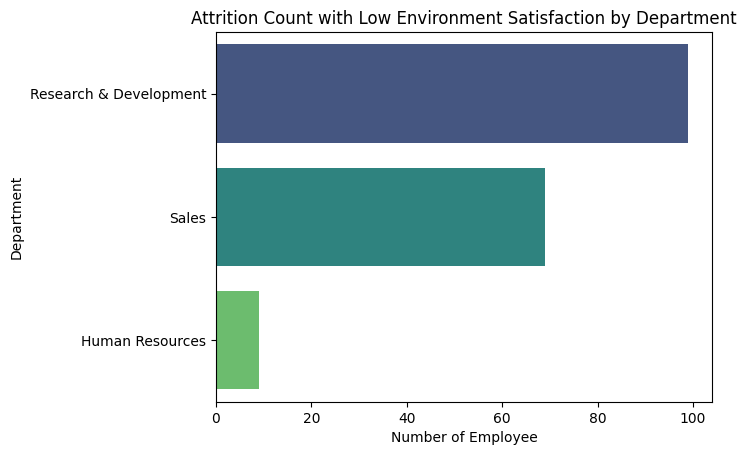

In [6]:
# Filter "Yes" in Attrition column
attrition_y = df[df['Attrition']== 'Yes']

#Filter Low Environment Satisfication  
env_low = attrition_y[attrition_y['EnvironmentSatisfaction'].isin([1,2,3])]

# Count per department
dept_count = env_low['Department'].value_counts().reset_index()
dept_count.columns = ['Department', 'Count']

# Make a Plot
sns.barplot(
    data = dept_count,
    x= 'Count',
    y = 'Department',
    palette = 'viridis'
)

plt.title('Attrition Count with Low Environment Satisfaction by Department')
plt.xlabel('Number of Employee')
plt.ylabel('Department')
plt.show()

The analysis shows that three departments have low to medium Environment Satisfaction (scores 1–3) and high attrition rates, with Research & Development having the highest attrition at 99 employees. This significant number indicates potential issues within the department’s work environment or processes. Further investigation is needed to identify and address these problems to reduce attrition driven by poor work conditions.

### 2. Percentage of Employees with Distance from Home > 13 KM Who Experienced Attrition

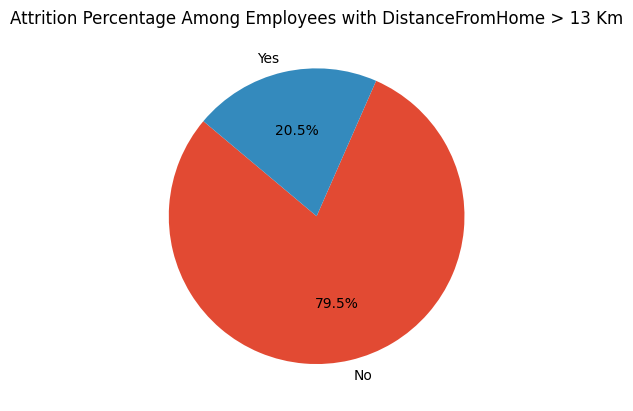

In [7]:
# Filter DistanceFromHome > 13
home_dist = df[df['DistanceFromHome'] > 13]

# Count attrition = Yes
attrition_count = home_dist['Attrition'].value_counts()

# Make a pie
plt.pie(
    attrition_count,
    labels = attrition_count.index,
    autopct= '%1.1f%%',
    colors=['#E24A33', '#348ABD'],
    startangle=140
)

plt.title('Attrition Percentage Among Employees with DistanceFromHome > 13 Km')
plt.show()

The pie chart shows that 20.5% of employees who live more than 13 km away from the office have experienced attrition. However, distance does not appear to be the primary reason for their resignation. There may be other contributing factors influencing employees’ decisions to leave. Although distance might have some impact, at this stage, it is not considered a main priority for our attrition reduction efforts.

### 3. How Many Employees with Over 5 Years Without Promotion and Poor Work-Life Balance Have Resigned, by Salary Level?

C:\Users\rifat\AppData\Local\Temp\ipykernel_6744\1223727229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['SalaryCategory'] = pd.cut(


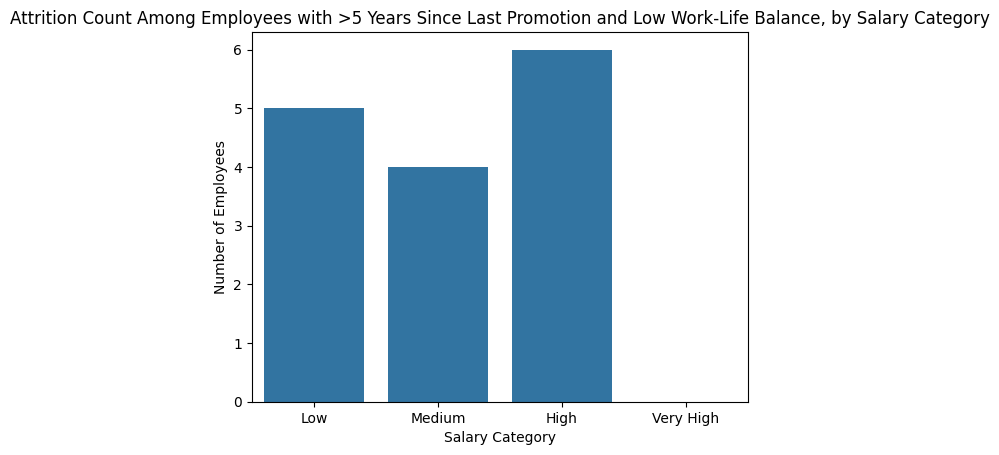

In [8]:
# Filter Data
filtered = df[
    (df['Attrition'] == 'Yes') &
    (df['YearsSinceLastPromotion'] > 5) &
    (df['WorkLifeBalance'] <= 2)
]

# Grouping Monthly Income
bins = [0, 5000, 10000, 15000, 20000]
labels = ['Low', 'Medium', 'High', 'Very High']

filtered['SalaryCategory'] = pd.cut(
    filtered['MonthlyIncome'],
    bins = bins,
    labels = labels,
    include_lowest=True
)

salary_count = filtered['SalaryCategory'].value_counts().reset_index()
salary_count.columns = ['SalaryCategory', 'Count']
salary_count.sort_values('SalaryCategory', inplace=True)

# Make Plot
sns.barplot(
    data = salary_count,
    x= 'SalaryCategory',
    y= 'Count'
)

plt.title('Attrition Count Among Employees with >5 Years Since Last Promotion and Low Work-Life Balance, by Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Number of Employees')
plt.show()

From the bar chart, we can see that employees with monthly salaries in the High category actually have the highest attrition count. This indicates that a high salary does not necessarily guarantee employee retention.

The plot suggests that employees in the High salary category may choose to resign for reasons such as poor work-life balance, or because they have not received a promotion for more than five years. Therefore, it is crucial for the company to pay closer attention to high-performing employees who have been in the same position for a long time without advancement. This situation could increase the risk of attrition, even among those earning higher salaries.